In [566]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, classification_report

In [568]:
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [569]:
df = df.drop(columns=['restecg', 'oldpeak', 'slp', 'caa', 'thall'])

In [570]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
thalachh    0
exng        0
output      0
dtype: int64

In [571]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,output
164,38,1,2,138,175,0,173,0,1


In [572]:
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,output


In [573]:
df.reset_index(drop=True)
df

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,output
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0
299,45,1,3,110,264,0,132,0,0
300,68,1,0,144,193,1,141,0,0
301,57,1,0,130,131,0,115,1,0


In [574]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,149.569536,0.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,22.903527,0.470196,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,152.500000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,166.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,1.000000


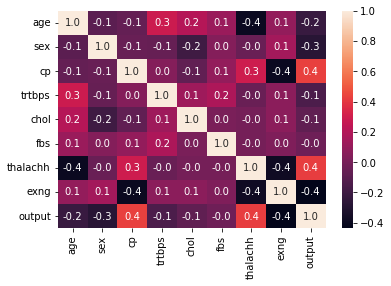

In [601]:
df_corrMatrix = df.corr()
sns.heatmap(df_corrMatrix, annot=True, fmt=".1f")
# plt.tick_params(axis = 'x', labelsize = 12)
# plt.tick_params(axis = 'y', labelsize = 12)
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

In [576]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [577]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,63,1,3,145,233,1,150,0
1,37,1,2,130,250,0,187,0
2,41,0,1,130,204,0,172,0
3,56,1,1,120,236,0,178,0
4,57,0,0,120,354,0,163,1
...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,123,1
298,45,1,3,110,264,0,132,0
299,68,1,0,144,193,1,141,0
300,57,1,0,130,131,0,115,1


In [578]:
pd.DataFrame(y)

,0
0,1
1,1
2,1
3,1
4,1
...,...
297,0
298,0
299,0
300,0


In [579]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [580]:
print(X_train.shape)
print(X_test.shape)

(241, 8)
(61, 8)


In [581]:
print(y_train.shape)
print(y_test.shape)

(241,)
(61,)


In [582]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [583]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(8,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [584]:
model.compile(
  loss=tf.keras.losses.binary_crossentropy,
  optimizer=tf.keras.optimizers.Adam(),
  metrics=[
    "accuracy"
  ]
)

In [585]:
history = model.fit(
  X_train,
  y_train,
  epochs=100,
  validation_data=(X_test, y_test),
  verbose=1
)

Epoch 1/100
8/8 [==============================] - 1s 42ms/step - loss: 4.7503 - accuracy: 0.4066 - val_loss: 6.3827 - val_accuracy: 0.3607
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 4.1348 - accuracy: 0.4564 - val_loss: 5.5009 - val_accuracy: 0.3115
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 3.8648 - accuracy: 0.4274 - val_loss: 4.8003 - val_accuracy: 0.3279
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 3.2512 - accuracy: 0.4523 - val_loss: 4.2329 - val_accuracy: 0.4098
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2.9523 - accuracy: 0.4896 - val_loss: 3.6521 - val_accuracy: 0.4426
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 2.6140 - accuracy: 0.4813 - val_loss: 3.1838 - val_accuracy: 0.4098
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 2.3573 - accuracy: 0.4689 - val_loss: 2.7744 - val_accuracy: 0.4426
Epoch 8/100
8/8 [=========

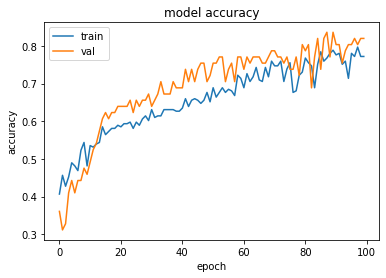

<Figure size 720x720 with 0 Axes>

In [613]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

f.savefig('accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

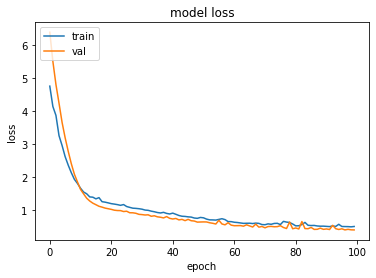

In [608]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.savefig('loss.png', dpi=300, bbox_inches='tight')
plt.show()

In [588]:
model.save(os.path.join('.', 'NO.h5'))

In [589]:
prediction = model.predict(X_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(prediction)]

2/2 [==============================] - 0s 1ms/step


In [590]:
cr = classification_report(y_test, prediction_classes, zero_division = 1, output_dict = True)
print(cr)

{'0': {'precision': 0.8, 'recall': 0.8275862068965517, 'f1-score': 0.8135593220338982, 'support': 29}, '1': {'precision': 0.8387096774193549, 'recall': 0.8125, 'f1-score': 0.8253968253968254, 'support': 32}, 'accuracy': 0.819672131147541, 'macro avg': {'precision': 0.8193548387096774, 'recall': 0.8200431034482758, 'f1-score': 0.8194780737153617, 'support': 61}, 'weighted avg': {'precision': 0.8203067160232682, 'recall': 0.819672131147541, 'f1-score': 0.8197691598636305, 'support': 61}}


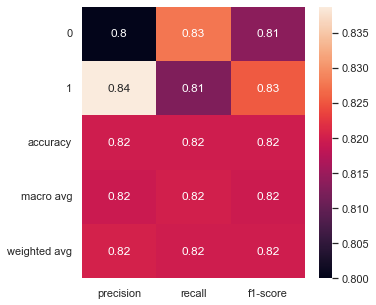

In [617]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot = True)
plt.savefig('accuracy.png', dpi=300, bbox_inches='tight')
